In [6]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from library.sb_utils import save_file
import warnings
warnings.filterwarnings('ignore')

This is the data wrangling and EDP for the project of book recommendation. First, we will load the data. There are three datasets for this project. The first one contains information for the books. The second one contains information about the rating. The third one contains information about the users. We will combine these three datasets into one after the inspection.

In [7]:
# Load the data. 
bookdataset=pd.read_csv('data/BX_Books.csv', sep=';',encoding='CP1252')
ratingdataset=pd.read_csv('data/BX-Book-Ratings.csv', sep=';',encoding='CP1252')
userdataset=pd.read_csv('data/BX-Users.csv', sep=';',encoding='CP1252')

# The bookdataset

Let's take a look at the bookdataset.

In [8]:
# First, let's look at the dataset for the book: bookdataset.
bookdataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
bookdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


It seems there is very small null cell. This is a good thing. A few columns that are important to us are: ISBN, Book-Title, Book-Author.

In [10]:
bookdataset[bookdataset['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


A quick search on the internet says that the author of this book is Larissa Anne Downes. Let's fill this info in.

In [11]:
bookdataset['Book-Author'][bookdataset['Book-Author'].isnull()]='Larissa Anne Downes'

We will drop the publisher column because it won't contribute much to our recommendation. There's no need to fill the empty cell.

In [12]:
bookdataset.describe(include = 'all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271379,271379,271379,271379.000000,271377,271379,271379,271379
unique,271379,242154,102029,NaN,16806,271063,271063,271063
top,0446605972,Selected Poems,Agatha Christie,NaN,Harlequin,http://images.amazon.com/images/P/006017143X.0...,http://images.amazon.com/images/P/044040665X.0...,http://images.amazon.com/images/P/038079439X.0...
freq,1,27,632,NaN,7536,2,2,2
mean,NaN,NaN,NaN,1959.756050,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,258.011363,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN


It's to be expected that the number of ISBN to be unique. However, there are many books have similar title. Let's take a closer look at them.

In [13]:
bookdataset['Book-Title'].value_counts()

Selected Poems                                                                                              27
Little Women                                                                                                24
Wuthering Heights                                                                                           21
Dracula                                                                                                     20
The Secret Garden                                                                                           20
                                                                                                            ..
Joke Book                                                                                                    1
Everyday Grace: Having Hope, Finding Forgiveness, and Making Miracles                                        1
Jane Eyre: With Connections (Hrw Library)                                                                    1
L

In [14]:
bookdataset[bookdataset['Book-Title']=='Selected Poems'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
4523,081120958X,Selected Poems,William Carlos Williams,1985,New Directions Publishing Corporation,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...,http://images.amazon.com/images/P/081120958X.0...
39417,0811201465,Selected Poems,K. Patchen,1957,New Directions Publishing Corporation,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...,http://images.amazon.com/images/P/0811201465.0...
41317,0679750800,Selected Poems,Rita Dove,1993,Vintage Books USA,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...,http://images.amazon.com/images/P/0679750800.0...
106890,0060931744,Selected Poems,Gwendolyn Brooks,1999,Perennial,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...,http://images.amazon.com/images/P/0060931744.0...
118780,0517101548,Selected Poems,John Donne,1994,Gramercy Books,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...,http://images.amazon.com/images/P/0517101548.0...


In [15]:
bookdataset[bookdataset['Book-Title']=='Little Women'].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
3952,185854176X,Little Women,Louisa M. Atcott,1995,Brimax Books Ltd,http://images.amazon.com/images/P/185854176X.0...,http://images.amazon.com/images/P/185854176X.0...,http://images.amazon.com/images/P/185854176X.0...
4330,0861782356,Little Women,Louisa May Alcott,0,Octopus Publising Group Plc,http://images.amazon.com/images/P/0861782356.0...,http://images.amazon.com/images/P/0861782356.0...,http://images.amazon.com/images/P/0861782356.0...
12228,0590203509,Little Women,Louisa May Alcott,1994,Scholastic,http://images.amazon.com/images/P/0590203509.0...,http://images.amazon.com/images/P/0590203509.0...,http://images.amazon.com/images/P/0590203509.0...
20677,0440447682,Little Women,Louisa May Alcott,1990,Yearling Books,http://images.amazon.com/images/P/0440447682.0...,http://images.amazon.com/images/P/0440447682.0...,http://images.amazon.com/images/P/0440447682.0...
32838,1550134140,Little Women,Louisa May Alcott,0,Firefly Books Ltd,http://images.amazon.com/images/P/1550134140.0...,http://images.amazon.com/images/P/1550134140.0...,http://images.amazon.com/images/P/1550134140.0...


Except for the "Selected Poem" title, a lot of the books with the same name are just reprints. Let's merge them into a single copy. We will use the title of the book, the author's first name to merge these books.

In [16]:
bookdataset['Book-Author']

0           Mark P. O. Morford
1         Richard Bruce Wright
2                 Carlo D'Este
3             Gina Bari Kolata
4              E. J. W. Barber
                  ...         
271374          Paula Danziger
271375              Teri Sloat
271376        Christine Wicker
271377                   Plato
271378     Christopher  Biffle
Name: Book-Author, Length: 271379, dtype: object

In [17]:
BookAuthor = bookdataset['Book-Author'].str.split(' ', expand=True)

In [18]:
bookdataset["Author-First-Name"]=BookAuthor.iloc[:,0]

We need to create a list that can connect the ISBN of the books that we merge to the ISBN of the books that remain. This way we can update the ISBN on the rating dataset.

In [19]:
duplicatetodrop=bookdataset[bookdataset[['Book-Title',"Author-First-Name"]].duplicated()][['ISBN','Book-Title',"Author-First-Name"]]

In [20]:
duplicatetodrop[['Book-Title',"Author-First-Name"]].value_counts()

Book-Title                                     Author-First-Name
Little Women                                   Louisa               21
Wuthering Heights                              Emily                19
Adventures of Huckleberry Finn                 Mark                 19
The Secret Garden                              Frances              18
Jane Eyre                                      Charlotte            17
                                                                    ..
Shogun                                         James                 1
Shock Wave (Dirk Pitt Adventures (Paperback))  Clive                 1
Shock                                          Robin                 1
Shoah                                          Claude                1
!%@ (A Nutshell handbook)                      Donnalyn              1
Length: 16616, dtype: int64

In [21]:
booktokeep=bookdataset[bookdataset[['Book-Title',"Author-First-Name"]].duplicated(keep=False)][['ISBN','Book-Title',"Author-First-Name"]].drop_duplicates(subset=['Book-Title',"Author-First-Name"])

In [22]:
booktokeep.value_counts()

ISBN        Book-Title                               Author-First-Name
B0001GDNCK  The Taming                               Jude                 1
0399138293  Mortal Memory                            Thomas               1
0399142282  Hornet's Nest                            Patricia             1
0399142223  The Roaring Girl: Stories                Greg                 1
0399142193  Executive Orders                         Tom                  1
                                                                         ..
067166154X  Sylvester and the Magic Pebble           William              1
0671660632  Dirk Gently's Holistic Detective Agency  Douglas              1
0671657860  Many Lives, Many Masters                 Brian                1
0671656570  MY SWEET AUDRINA                         V.                   1
0001046438  Liar                                     Stephen              1
Length: 16616, dtype: int64

In [23]:
bookdataset.drop_duplicates(subset=['Book-Title',"Author-First-Name"],inplace=True)

In [24]:
bookdataset.describe(include="all")

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Author-First-Name
count,249931,249931,249931,249931.000000,249929,249931,249931,249931,249931
unique,249931,242154,101609,NaN,16591,249930,249930,249930,14994
top,0446605972,Selected Poems,William Shakespeare,NaN,Harlequin,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,http://images.amazon.com/images/P/051513628X.0...,John
freq,1,24,496,NaN,7506,2,2,2,5378
mean,NaN,NaN,NaN,1960.923991,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,253.720773,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1995.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN


In [25]:
bookdataset['Book-Title'].value_counts()

Selected Poems                    24
The Gift                          12
Secrets                           11
The Promise                       11
Dinosaurs                         11
                                  ..
How to Heal the Hurt by Hating     1
Die Pest.                          1
The Tiger's Daughter               1
Embrace and Conquer                1
Goodbye Tsugumi                    1
Name: Book-Title, Length: 242154, dtype: int64

In [26]:
booktokeep.rename(columns={"ISBN": "ISBN to replace"},inplace=True)

In [27]:
booktokeep

,ISBN to replace,Book-Title,Author-First-Name
0,0195153448,Classical Mythology,Mark
5,0399135782,The Kitchen God's Wife,Amy
6,0425176428,What If?: The World's Foremost Military Histor...,Robert
9,074322678X,Where You'll Find Me: And Other Stories,Ann
14,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack
...,...,...,...
266749,0807557722,"Not Yet, Yvette",Helen
268150,0718809181,These Happy Golden Years,Laura
269206,083480087X,Human Revolution,Daisaku
269649,0673992004,Historical Viewpoints: Notable Articles from A...,John


In [28]:
duplicatetodrop

,ISBN,Book-Title,Author-First-Name
239,0743486226,Angels & Demons,Dan
405,006101351X,The Perfect Storm : A True Story of Men Agains...,Sebastian
456,044021145X,The Firm,John
475,014023828X,The Tortilla Curtain,T.
526,039914739X,Isle of Dogs,Patricia
...,...,...,...
271242,0451625145,Thirteen Days: A Memoir of the Cuban Missile C...,Robert
271265,0195124995,For Cause and Comrades: Why Men Fought in the ...,James
271335,0441011799,Singularity Sky,Charles
271365,0395264707,Dreamsnake,Vonda


In [29]:
isbnreplace=duplicatetodrop.merge(booktokeep, on='Book-Title', how='left')[['ISBN','ISBN to replace']]

We will drop the publisher and year of publishing columns because they won't contribute much to our recommendation.

In [30]:
bookdatasettobemerge=bookdataset[['ISBN','Book-Title','Book-Author','Image-URL-S','Image-URL-M','Image-URL-L']]

In [31]:
isbnreplace

,ISBN,ISBN to replace
0,0743486226,0671027360
1,006101351X,0060977477
2,044021145X,0385416342
3,014023828X,0670856045
4,039914739X,0425182908
...,...,...
22611,0451625145,0451627946
22612,0195124995,0195090233
22613,0441011799,0441010725
22614,0395264707,0553296590


# The rating dataset

Now, let's take a look at the rating dataset.

In [32]:
ratingdataset.head() 

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Now, let's replace the ISBN of reprint books to the one that we keep earlier.

In [33]:
for i in range(len(isbnreplace)):
    ratingdataset[ratingdataset['ISBN']==isbnreplace['ISBN'][i]]['ISBN']=isbnreplace['ISBN to replace'][i]

In [34]:
ratingdataset['ISBN']

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [35]:
ratingdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [36]:
ratingdataset.describe(include = 'all')

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


Hmm it seems there are more unique ISBN in this rating dataset than the book dataset. We will remove the ISBN that does not appear to all the set when we merge the datasets.

# The user dataset

In [52]:
userdataset=pd.read_csv('data/BX-Users.csv', sep=';',encoding='CP1252')

In [53]:
userdataset.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [54]:
userdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [55]:
userdataset.describe(include = 'all')

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


We will drop the "Location" column since they does not contribute much to our analysis. For the "Age" column, there are many null values. In addition, there are people with 0 age and 244 age. So, first, we will drop the change the "Age" that are smaller than 10 and bigger than 90 to null. Next, we will fill the null values using the distribution of the current "Age" values. 

In [56]:
userdataset.loc[userdataset['Age']<10,'Age']=np.nan

In [57]:
userdataset.loc[userdataset['Age']>90,'Age']=np.nan

In [58]:
isnull = userdataset.Age.isnull()
sample = userdataset.Age.dropna().sample(isnull.sum(), replace=True).values
userdataset.loc[isnull, 'Age'] = sample

<AxesSubplot:xlabel='Age', ylabel='Count'>

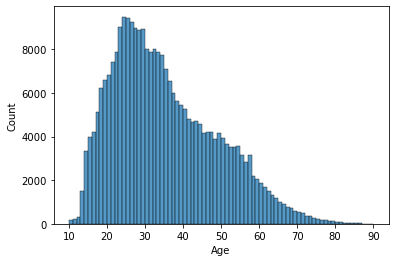

In [59]:
sns.histplot(userdataset['Age'], binwidth=1)

In [60]:
userdataset.drop(['Location'], axis=1,inplace=True)

In [61]:
userdataset.describe(include = 'all')

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,34.760276
std,80499.51502,13.565091
min,1.00000,10.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,90.000000


# Merging the data

In [62]:
finaldata=ratingdataset.merge(bookdatasettobemerge, on='ISBN', how='left')

In [63]:
finaldata=finaldata.merge(userdataset,on='User-ID', how='left')

In [64]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1149780 non-null  int64  
 1   ISBN         1149780 non-null  object 
 2   Book-Rating  1149780 non-null  int64  
 3   Book-Title   912430 non-null   object 
 4   Book-Author  912430 non-null   object 
 5   Image-URL-S  912430 non-null   object 
 6   Image-URL-M  912430 non-null   object 
 7   Image-URL-L  912430 non-null   object 
 8   Age          1149780 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 87.7+ MB


As shown earlier, we don't have all the information for all the rated books. We will drop all the rows that have null in it.

In [65]:
finaldata.dropna(how='any',inplace=True)

In [66]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912430 entries, 0 to 1149778
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      912430 non-null  int64  
 1   ISBN         912430 non-null  object 
 2   Book-Rating  912430 non-null  int64  
 3   Book-Title   912430 non-null  object 
 4   Book-Author  912430 non-null  object 
 5   Image-URL-S  912430 non-null  object 
 6   Image-URL-M  912430 non-null  object 
 7   Image-URL-L  912430 non-null  object 
 8   Age          912430 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 69.6+ MB


In [67]:
# save the data to a new csv file
datapath = 'data'
save_file(finaldata, 'book_recommendation.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.


# EDA

## The users

First, let's check how often the user rates the product.

In [69]:
finaldata['User-ID'].value_counts()

11676     9804
198711    6084
98391     5426
153662    5392
35859     5072
          ... 
198573       1
165712       1
159565       1
153418       1
200545       1
Name: User-ID, Length: 85242, dtype: int64

Someone actually rates over 9000 books. Let's plot this to see how this distribute.

In [80]:
countuser=pd.DataFrame({'User-ID':finaldata['User-ID'].value_counts().index, 'occurence':finaldata['User-ID'].value_counts().values})

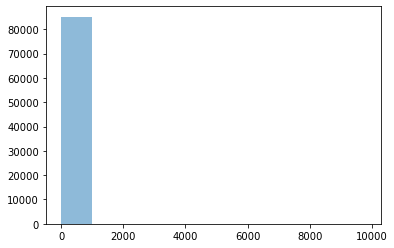

In [92]:
plt.hist(countuser['occurence'],alpha=0.5)
plt.show()

It seems that there are a lot of users with only 1 rating. Let's take a closer look.

In [93]:
countuser['occurence'].value_counts()

1       47349
2       10238
3        5491
4        3608
5        2450
        ...  
339         1
403         1
467         1
659         1
1054        1
Name: occurence, Length: 617, dtype: int64

So the number of users who only have 1 rating is over half the entire users.

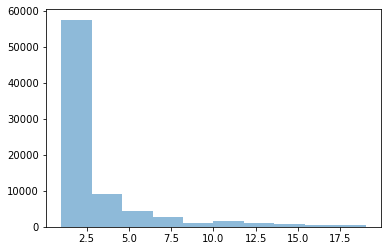

In [98]:
plt.hist(countuser[countuser['occurence']<20]['occurence'],alpha=0.5)
plt.show()

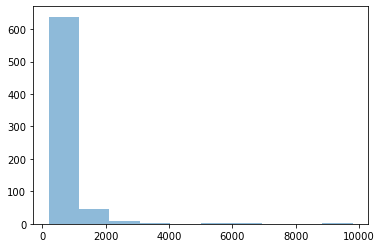

In [107]:
plt.hist(countuser[countuser['occurence']>200]['occurence'],alpha=0.5)
plt.show()

The percent of ratings with only 1 user is:

In [99]:
47349/912430*100

5.189329592407089

For users with only 1 ratings, collaborative methods will be difficult to apply for them. I might consider dropping them since they only constitute about 5% of the rating.

## The books

Next, let's check how often the books are rated.

In [101]:
finaldata['Book-Title'].value_counts()

Wild Animus                                                                                                                      2502
The Lovely Bones: A Novel                                                                                                        1295
The Da Vinci Code                                                                                                                 887
A Painted House                                                                                                                   831
Divine Secrets of the Ya-Ya Sisterhood: A Novel                                                                                   732
                                                                                                                                 ... 
Bulb Gardening With Derek Fell: Practical Advice and Personal Favorites from the Best-Selling Author and Television Show Host       1
Pale as the Dead (Natasha Blake, 1)                           

It turns out "Wild Animus" is the most rated book. There's a little interesting story about this book. It turns out the author self-published it with his own company and distributed it freely in 2004. Rumor said that the book was quite bad and people gave it away freely to others.

In [102]:
finaldata[finaldata['Book-Title']=='Wild Animus']['Book-Rating'].mean()

1.0195843325339728

In [103]:
countbook=pd.DataFrame({'User-ID':finaldata['Book-Title'].value_counts().index, 'occurence':finaldata['Book-Title'].value_counts().values})

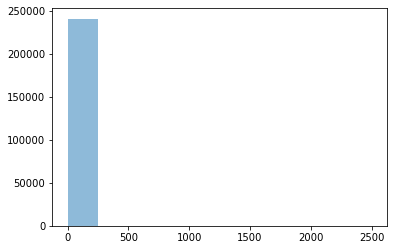

In [104]:
plt.hist(countbook['occurence'],alpha=0.5)
plt.show()

In [105]:
countbook['occurence'].value_counts()

1      130966
2       43010
3       19925
4       11165
5        7254
        ...  
579         1
451         1
321         1
320         1
571         1
Name: occurence, Length: 323, dtype: int64

Similar to the case of users, there are many books with only 1 ratings. We will drop those because we have so little information on the book to give meaningful rating.

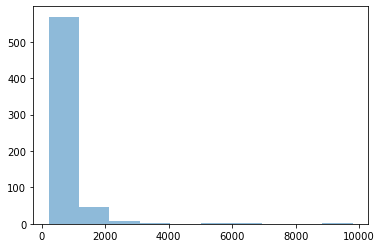

In [108]:
plt.hist(countuser[countbook['occurence']>100]['occurence'],alpha=0.5)
plt.show()

## The Ratings 

In [113]:
finaldata['Book-Rating'].value_counts()

0     574001
8      80490
10     62882
7      58614
9      53092
5      40561
6      28042
4       6777
3       4520
2       2106
1       1345
Name: Book-Rating, dtype: int64

<AxesSubplot:xlabel='Book-Rating', ylabel='Count'>

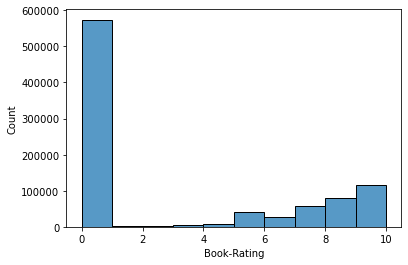

In [115]:
sns.histplot(finaldata['Book-Rating'], binwidth=1)

Hmm, the rating is actually quite bipolar. Perhaps we can turn the problem into a classification problem with books having rating 0,1,2,3 to be disliked; books with rating 4,5,6 to be neutral; and books with rating 7,8,9,10 to be liked.